# <font color='Blue'>Sistema de Classificação de Risco para Concessão de Empréstimos</font>

## 1° Problema de negócios

Precisamos construir um sistema de classificação de risco do cliente para aprovação de empréstimos.

##### **Fonte dos Dados**

Usaremos a base de dados "**risco.csv**" originada por meio dos dados da **UCI Machine Learning**.

**Link**: https://archive.ics.uci.edu/ml/index.php

###### **Arquitetura dos Dados** (AD)

* **id_cliente**  : Número de identificação única do cliente
* **inad**        : Índice de inadimplência do cliente
* **Saldo_contas**: Índice referente aos saldos das contas corrente, poupança e aplicações do cliente
* **Class_Renda** : Índice referente à classificação do cliente de acordo com sua renda.
* **Anotações**   : Índice referente às anotações externas à empresa, tais como anotações SERASA / SPC / BACEN 
* **Risco**       : Risco do Cliente atribuído dadas as variáveis de análise do cliente

## 2° Análise Exploratória dos Dados

In [1]:
# Importando Bibliotecas Essenciais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [2]:
# Carregando os dados
dataset = pd.read_csv('risco.csv')

In [3]:
# Verificando os primeiros registros
dataset.head(10)

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto
5,5,5.4,3.9,1.7,0.4,Risco_Alto
6,6,4.6,3.4,1.4,0.3,Risco_Alto
7,7,5.0,3.4,1.5,0.2,Risco_Alto
8,8,4.4,2.9,1.4,0.2,Risco_Alto
9,9,4.9,3.1,1.5,0.1,Risco_Alto


In [4]:
# Informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Verificando as dimensões do dataset
dataset.shape

(150, 6)

In [6]:
# Estatísticas descritivas das variáveis numéricas
dataset.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Tabela de frequência da variável Risco
dataset['Risco'].value_counts()

Risco_Alto     50
Risco_Baixo    50
Risco_Medio    50
Name: Risco, dtype: int64

C:\Users\belli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risco', ylabel='count'>

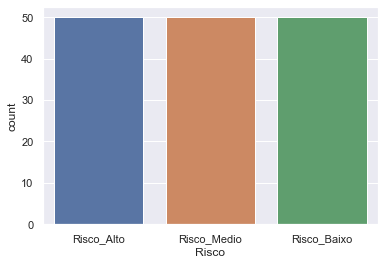

In [8]:
# Cria um gráfico de barras da variável Target
sns.countplot(dataset['Risco'])

In [9]:
# Contando o número de valores nulos
dataset.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [10]:
# Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente
dataset = dataset.drop(columns='id_cliente')

In [11]:
# Printando o dataset
dataset

,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,5.1,3.5,1.4,0.2,Risco_Alto
1,4.9,3.0,1.4,0.2,Risco_Alto
2,4.7,3.2,1.3,0.2,Risco_Alto
3,4.6,3.1,1.5,0.2,Risco_Alto
4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Risco_Baixo
146,6.3,2.5,5.0,1.9,Risco_Baixo
147,6.5,3.0,5.2,2.0,Risco_Baixo
148,6.2,3.4,5.4,2.3,Risco_Baixo


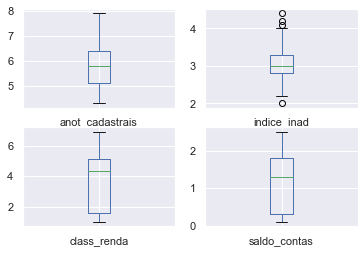

In [12]:
# Criando um gráfico boxplot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

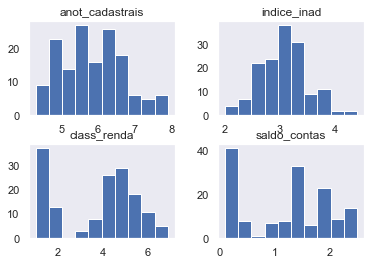

In [13]:
# Criando um histohrama
dataset.hist(grid=False)
plt.show()

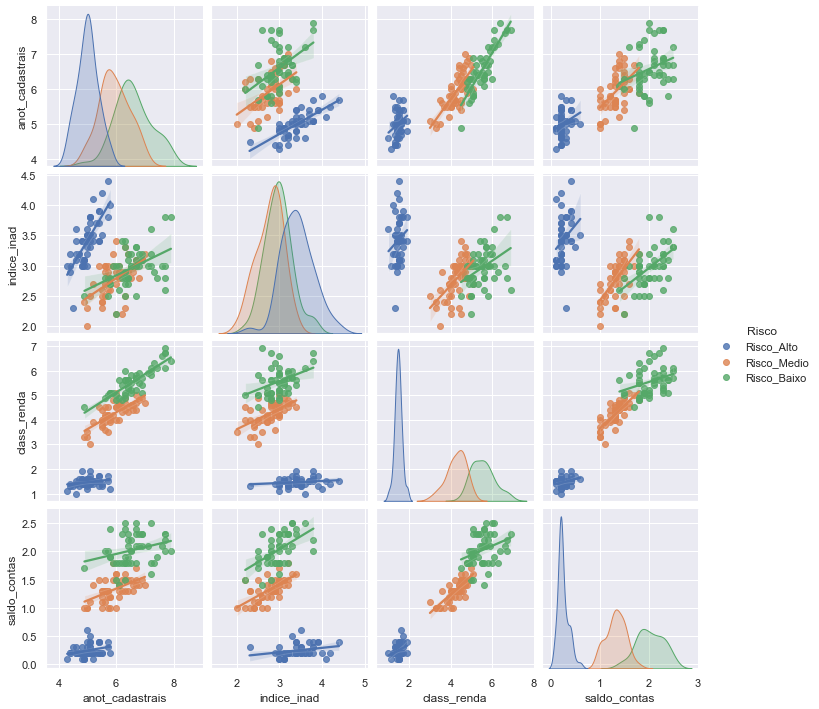

In [14]:
# Criação do gráfico de dispersão
sns.pairplot(dataset, hue='Risco', kind="reg")

# kind=reg é a reta de regressão
# hue='Risco' é para dividir em cores os grupos de risco

## 3° Pré-Processamento dos Dados

In [15]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
X = dataset.iloc[:,:-1].values  #variáveis independentes
y = dataset.iloc[:,-1].values  #Target/labe/class/vairável dependente

In [16]:
#Print das variáveis X e y
print("\nVariáveis de Entrada da avaliação:\n\n", X)
print("\nRisco - Variável a ser Predita :\n\n", y)


Variáveis de Entrada da avaliação:

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.

### Separando os dados entre Treino e Teste

In [17]:
# Dividindo o dataset em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2)

In [18]:
# Amostra dos grupos de treino e teste

print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

X = 
 [[5.4 3.7 1.5 0.2]
 [5.6 3.  4.5 1.5]]
y = 
 ['Risco_Alto' 'Risco_Medio']


Dados de Teste :
----------------

X = 
 [[5.  3.2 1.2 0.2]
 [6.7 3.1 5.6 2.4]]
y = 
 ['Risco_Alto' 'Risco_Baixo']


In [19]:
# Verificando o formato dos grupos

print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 4)
Shape dos dados de teste é (30, 4)


### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


In [20]:
# Redimensionando os dados - feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[-0.48525013  1.40608277 -1.23292066 -1.269112  ]
 [-0.24806066 -0.14596654  0.47026982  0.4450133 ]
 [ 0.58210249  0.51919745  1.32186506  1.76357122]
 [-0.24806066 -1.25457319  0.12963172 -0.08240987]
 [-0.84103433  0.51919745 -1.11937463 -0.87354462]]
-------------------------

X_test :
 [[-0.95962907  0.29747612 -1.40323971 -1.269112  ]
 [ 1.05648144  0.07575479  1.09477299  1.63171543]
 [ 0.22631829 -0.36768787  0.47026982  0.4450133 ]
 [ 1.05648144  0.51919745  1.15154601  1.23614805]
 [-1.31541328  0.29747612 -1.3464667  -1.269112  ]]


## 4° Construindo a Máquina Preditiva

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Aqui nós vamos criar a primeira versão da Máquina Preditiva. Depois, vamos buscar formas de melhorar a assertividade do modelo. 

In [21]:
# Importando a Biblioteca KNN

from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]

In [22]:
#Treinando a Máquina preditiva com os dados de treino

Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)

In [23]:
#Fazendo novas Previsões com os dados de teste
y_pred = Maquina_Preditiva.predict(X_test)


print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 ['Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo']

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 ['Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo']


In [24]:
#Função que mostra os hyperparâmetros utilizados na construção da Máquina Preditiva 
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=30)>

## 5° Avaliando a Máquina Preditiva

In [25]:
# Calculando a Acurácia

from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred).round(2))

Acurácia da Máquina =  0.87


In [26]:
# Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df.head(5)


Real vs Predito 
------------------------------



,Real,Predito
0,Risco_Alto,Risco_Alto
1,Risco_Baixo,Risco_Baixo
2,Risco_Medio,Risco_Medio
3,Risco_Baixo,Risco_Baixo
4,Risco_Alto,Risco_Alto


In [27]:
#Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[ 8  0  0]
 [ 0 10  3]
 [ 0  1  8]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         8
 Risco_Baixo       0.91      0.77      0.83        13
 Risco_Medio       0.73      0.89      0.80         9

    accuracy                           0.87        30
   macro avg       0.88      0.89      0.88        30
weighted avg       0.88      0.87      0.87        30



## 2° Versão da Máquina Preditiva: Máquina Definitiva

In [28]:
# Importando a Biblioteca do SVM
from sklearn.svm import SVC

classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)

In [29]:
#Treinando a Máquina com o SVC
classifier.fit(X_train,y_train)



SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [30]:
#Fazendo novas previsões com os dados de teste
y_pred = classifier.predict(X_test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_test)


---------------------------

Predicted Values for Test Set :
 ['Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo']

---------------------------

Actual Values for Test Set :
 ['Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo']


In [31]:
#Imprimindo os hyperparâmetros utilizados na criação da Maquina Preditiva Definitiva
classifier

SVC(C=10, gamma=1e-05, kernel='linear', random_state=7)

In [32]:
# Calculando a Acurácia da Máquina Preditiva

print("Acurácia = ", accuracy_score(y_test, y_pred).round(2))

# Comparando valores Reais com Preditos pela Máquina
print("\nActual vs Predicted  \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df.head()

Acurácia =  0.9

Actual vs Predicted  
------------------------------



,Actual,Predicted
0,Risco_Alto,Risco_Alto
1,Risco_Baixo,Risco_Baixo
2,Risco_Medio,Risco_Medio
3,Risco_Baixo,Risco_Baixo
4,Risco_Alto,Risco_Alto


In [33]:
#Usando a confusion matrix e o classification report para avaliar a Máquina

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)


In [34]:
# Imprimindo a Confusion Matrix e o Classification Report

print(cm)
print(cr)

[[ 8  0  0]
 [ 0 11  2]
 [ 0  1  8]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         8
 Risco_Baixo       0.92      0.85      0.88        13
 Risco_Medio       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

